## Einstieg in PyTorch

In [1]:
!pip install matplotlib

In [2]:
import torch 

In [3]:
a = torch.tensor([1,1])
print(a)

tensor([1, 1])


In [4]:
a.shape

torch.Size([2])

In [5]:
a = torch.tensor([[1,2],[1,2],[1,2]])
a


tensor([[1, 2],
        [1, 2],
        [1, 2]])

In [6]:
a.shape

torch.Size([3, 2])

### Views und Slices

In [7]:
a.view(-1)

tensor([1, 2, 1, 2, 1, 2])

In [8]:
a.view(2,-1)

tensor([[1, 2, 1],
        [2, 1, 2]])

In [9]:
a[:,1]

tensor([2, 2, 2])

In [10]:
a[:2,:]

tensor([[1, 2],
        [1, 2]])

### Matrix Multiplikation

In [11]:
torch.tensor([[1,2],[1,2],[1,2]]) @ torch.tensor([1,1])

tensor([3, 3, 3])

In [12]:
import torch.nn.functional as F


# standard plotting library
import matplotlib.pyplot as plt

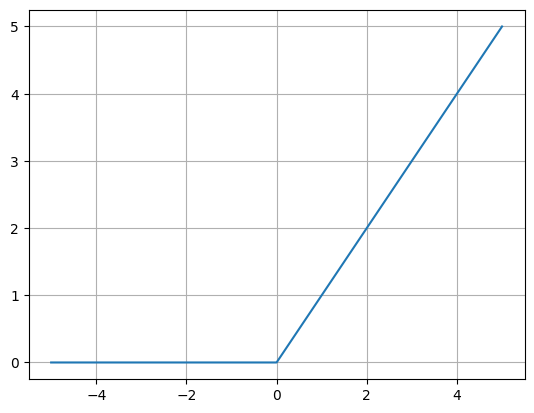

In [15]:
prob = torch.linspace(-5, 5, 1000)
plt.plot(prob, torch.relu(prob))
plt.grid()

## Lossfunktionen

Eine Lossfunktion, auch Verlust- oder Kostenfunktion genannt, bewertet die Leistung eines maschinellen Lernmodells, indem sie die Abweichung zwischen den Vorhersagen des Modells und den tatsächlichen Zielen misst. Diese Funktion gibt einen numerischen Wert aus, der minimiert werden soll, und bietet damit ein quantitatives Maß, das im Trainingsprozess zur Optimierung des Modells verwendet wird.


### Regression: Mean Absolut Error oder L1 Loss

Dieses Loss wird genuzt wenn das Netz einen konkreten Wert vorhersagen soll. Beispielsweise den zukünftigen Pegelstand der Elbe auf basis der historischen Pegelstände.

In [16]:
output = torch.tensor([1.0]) # Ausgabe des Netzwerks
target = torch.tensor([5.0]) # Zielwert

absoult_error = torch.abs(output - target)

print("absolut error", absoult_error)

mean_absolut_error = torch.mean(absoult_error)

print("mean absolut error", mean_absolut_error)

print("l1 loss == mean absolut error",mean_absolut_error, F.l1_loss(output,target))

absolut error tensor([4.])
mean absolut error tensor(4.)
l1 loss == mean absolut error tensor(4.) tensor(4.)


### Klassifikation: Softmax und Cross Entropy Loss


Dieses Loss wird genutzt wenn das Netz eine Eingabe einer konkreten Klasse zuordnen soll. 
Zum Beispiel wenn das Netz entscheiden soll ob das einen Hund oder eine Katze darstellt.

In [27]:
# Problem: Unser Netz kann beliebge Werte ausgeben
output = torch.tensor([ 0.0556, -0.0389, 0.6144])

Die Softmax-Funktion wandelt einen Vektor von K reellen Zahlen in eine Wahrscheinlichkeitsverteilung von K möglichen Ergebnissen um.


$$\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}} \ \ \ \ \text{ for } i = 1, \dotsc , K \text{ and } \mathbf z=(z_1,\dotsc,z_K) \in\R^K.$$

In [28]:
prob_dist = torch.softmax(output, dim=0)
prob_dist

print(prob_dist)
print(torch.sum(prob_dist))

tensor([0.2733, 0.2487, 0.4780])
tensor(1.)


In [29]:
most_likely_index = torch.argmax(prob_dist)

print(most_likely_index)
print(prob_dist[most_likely_index])


tensor(2)
tensor(0.4780)




### Das negative log likelihood loss


Der Logarithmus transformiert Wahrscheinlichkeiten in eine Lossfunktion. Je niedriger die Wahrscheinlichkeit, die ein Modell der richtigen Klasse zuweist, desto höher ist der resultierende Loss. Das passt gut zu Optimierungsalgorithmen, die versuchen, das Loss zu minimieren.

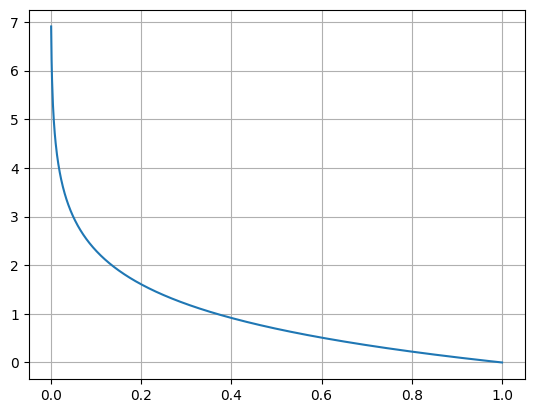

In [30]:
prob = torch.linspace(0.001, 1, 1000)
plt.plot(prob, -torch.log(prob))
plt.grid()

In [31]:
loss = -torch.log(torch.tensor(0.01)) # wahrscheinlichkeit von 10%
print("Loss bei einer Wahrscheinlichkeit von 1%:\t",loss.item())

loss = -torch.log(torch.tensor(0.50)) # wahrscheinlichkeit von 80%
print("Loss bei einer Wahrscheinlichkeit von 50%:\t",loss.item())

loss = -torch.log(torch.tensor(0.99)) # wahrscheinlichkeit von 80%
print("Loss bei einer Wahrscheinlichkeit von 99%:\t",loss.item())


Loss bei einer Wahrscheinlichkeit von 1%:	 4.605170249938965
Loss bei einer Wahrscheinlichkeit von 50%:	 0.6931471824645996
Loss bei einer Wahrscheinlichkeit von 99%:	 0.010050326585769653


### Cross Entropy Loss

Die Kombination aus Softmax und NNL Loss nennt sich auch "cross entropy" loss.


Es kombiniert zwei Operationen:

1. Umwandel der Ausgaben des Netzes in eine Wahrscheinlichkeitsverteilung 
2. Skalieren des Losses über den negativen Logaritmus.

In [35]:
output = torch.tensor([ 0.0556, -0.0389, 0.6144])
F.cross_entropy(output,torch.tensor(0))

tensor(1.2970)

## Wie lernt das Netz?

Wir nutzen die Ableitung der Fehlerfunktio, auch Fehlergradient genant, um die Gewichte des Netzes zu optimieren. Das Verfahren nennt sich Gradientenabstieg oder gradient descent.  

![Backpropagation](data/backpropagation.jpg)

In [92]:
x = torch.Tensor([100,0.0]) 
w = torch.tensor([0.009, 0.5], requires_grad=True)
y = torch.Tensor([1.0])

prediction = x @ w
print("Vorhersage vor dem Lernschritt",prediction.item())

Vorhersage vor dem Lernschritt 0.8999999761581421


In [93]:
loss = F.mse_loss(prediction,y[0])
loss

tensor(0.0100, grad_fn=<MseLossBackward0>)

In [94]:
loss.backward()
w.grad

tensor([-20.0000,  -0.0000])

In [95]:
learning_rate = 0.001
with torch.no_grad():
    w -= (learning_rate * w.grad)        

In [96]:
w

tensor([0.0290, 0.5000], requires_grad=True)

In [98]:
prediction  = F.sigmoid(x @ w)
print("Vorhersage nach dem Lernschritt",prediction.item())

Vorhersage nach dem Lernschritt 0.9478464722633362


Dieses Verfahren kann noch verbessert werden z.B. in dem wir einen Term für [das Momentum einführen](https://distill.pub/2017/momentum/).
Des weiteren gibt es eine Reihe von verschiedenen [Opimierungsverfahren zur Auswahl](https://pytorch.org/docs/stable/optim.html).